In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
sns.set(color_codes=True)

%matplotlib inline

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
with open("df_pre.pkl", 'rb') as picklefile: 
    df_pre = pickle.load(picklefile)
    

In [4]:
df_pre

,calories,carbohydrates,protein,rating,serving,url,cholesterol,sodium,reviews_count,make_it_again,...,Mussel,Clam,Ground Lamb,Paprika,Beer,Fig,Sesame,Halibut,Chestnut,success_score
"""Bloody Mary"" Tomato Toast with Celery and Horseradish",190,10,2,4.0,6,https://www.epicurious.com/recipes/food/views/...,6,344,2,1.00,...,0,0,0,0,0,0,0,0,0,4.000
"""Nextover"" Chicken Tacos with Quick Refried Beans",1224,65,65,3.0,2,https://www.epicurious.com/recipes/food/views/...,292,1632,3,0.67,...,0,0,0,0,0,0,0,0,0,2.010
10-Minute Chicken Flatbreads with Hummus and Yogurt,463,42,35,3.5,4,https://www.epicurious.com/recipes/food/views/...,115,917,6,0.83,...,0,0,0,0,0,0,0,0,0,2.905
10-Minute Sausage Skillet with Cherry Tomatoes and Broccolini,476,20,22,4.0,4,https://www.epicurious.com/recipes/food/views/...,70,1046,11,1.00,...,0,0,0,0,0,0,0,0,0,4.000
10-Minute Shrimp with Green Beans and Creamy Lemon-Dill Dip,482,18,30,2.5,4,https://www.epicurious.com/recipes/food/views/...,230,1189,3,1.00,...,0,0,0,0,0,0,0,0,0,2.500
3-Ingredient Buffalo Grilled Chicken Wings,569,1,40,4.0,4,https://www.epicurious.com/recipes/food/views/...,282,682,1,1.00,...,0,0,0,0,0,0,0,0,0,4.000
3-Ingredient Cacio e Pepe (Pasta With Cheese and Pepper),736,89,35,2.0,4,https://www.epicurious.com/recipes/food/views/...,66,922,5,0.60,...,0,0,0,0,0,0,0,0,0,1.200
3-Ingredient Chicken Breasts Stuffed with Ham and Cheese,467,2,64,3.0,4,https://www.epicurious.com/recipes/food/views/...,213,669,4,0.75,...,0,0,0,0,0,0,0,0,0,2.250
3-Ingredient Chipotle-Lime Grilled Steak,353,3,36,3.0,4,https://www.epicurious.com/recipes/food/views/...,116,504,6,1.00,...,0,0,0,0,0,0,0,0,0,3.000
3-Ingredient Creamy Pumpkin Pasta,694,91,17,3.0,4,https://www.epicurious.com/recipes/food/views/...,102,508,1,1.00,...,0,0,0,0,0,0,0,0,0,3.000


In [5]:
sns.pairplot(df[['success_score','url','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'reviews_count']])

NameError: name 'df' is not defined

## Features Selection

In [6]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE
X = df_pre.drop(['rating','url','date','make_it_again','success_score'], axis =1)
y = df_pre['rating']

model = LinearRegression()
# create the RFE model and select 90 features
rfe = RFE(model, 90)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
selected_features_ranking = list(zip(X.columns,rfe.support_,rfe.ranking_))


In [7]:
#create a new dataframe with only features selected by RFE
selected_features = [i[0] for i in selected_features_ranking if i[1] == True]
selected_features_df = pd.DataFrame()
for i in selected_features:
    selected_features_df[i] = df_pre[i]
    

In [8]:
df = pd.merge(df_pre[['success_score','rating','url','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'reviews_count','cooking_time']].reset_index(), selected_features_df.reset_index(), on = 'index', how='inner').set_index('index')
df

,success_score,rating,url,calories,carbohydrates,protein,cholesterol,sodium,reviews_count,cooking_time,...,Orange Juice,Banana,Fruit Juice,Bulgur,Brisket,Vanilla,Mussel,Ground Lamb,Fig,Halibut
index,,,,,,,,,,,,,,,,,,,,,
"""Bloody Mary"" Tomato Toast with Celery and Horseradish",4.000,4.0,https://www.epicurious.com/recipes/food/views/...,190,10,2,6,344,2,15,...,0,0,0,0,0,0,0,0,0,0
"""Nextover"" Chicken Tacos with Quick Refried Beans",2.010,3.0,https://www.epicurious.com/recipes/food/views/...,1224,65,65,292,1632,3,20,...,0,0,0,0,0,0,0,0,0,0
10-Minute Chicken Flatbreads with Hummus and Yogurt,2.905,3.5,https://www.epicurious.com/recipes/food/views/...,463,42,35,115,917,6,10,...,0,0,0,0,0,0,0,0,0,0
10-Minute Sausage Skillet with Cherry Tomatoes and Broccolini,4.000,4.0,https://www.epicurious.com/recipes/food/views/...,476,20,22,70,1046,11,10,...,0,0,0,0,0,0,0,0,0,0
10-Minute Shrimp with Green Beans and Creamy Lemon-Dill Dip,2.500,2.5,https://www.epicurious.com/recipes/food/views/...,482,18,30,230,1189,3,10,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Buffalo Grilled Chicken Wings,4.000,4.0,https://www.epicurious.com/recipes/food/views/...,569,1,40,282,682,1,30,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Cacio e Pepe (Pasta With Cheese and Pepper),1.200,2.0,https://www.epicurious.com/recipes/food/views/...,736,89,35,66,922,5,30,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Chicken Breasts Stuffed with Ham and Cheese,2.250,3.0,https://www.epicurious.com/recipes/food/views/...,467,2,64,213,669,4,25,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Chipotle-Lime Grilled Steak,3.000,3.0,https://www.epicurious.com/recipes/food/views/...,353,3,36,116,504,6,60,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.describe()


,success_score,rating,calories,carbohydrates,protein,cholesterol,sodium,reviews_count,cooking_time,Egg,...,Orange Juice,Banana,Fruit Juice,Bulgur,Brisket,Vanilla,Mussel,Ground Lamb,Fig,Halibut
count,1517.00000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,...,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,2.96496,3.382004,688.323665,38.027686,33.270929,153.690837,730.007910,25.615030,65.241266,0.097561,...,0.004614,0.004614,0.003955,0.003955,0.003955,0.003955,0.003955,0.003955,0.003955,0.003955
std,0.71083,0.434251,2667.917096,43.020833,107.602279,564.318168,868.607872,40.831328,62.789297,0.296818,...,0.067795,0.067795,0.062786,0.062786,0.062786,0.062786,0.062786,0.062786,0.062786,0.062786
min,0.31500,1.000000,25.000000,1.000000,1.000000,0.000000,1.000000,1.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.55500,3.000000,288.000000,13.000000,9.000000,26.000000,247.000000,6.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.08000,3.500000,485.000000,29.000000,23.000000,93.000000,553.000000,14.000000,45.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.50000,3.500000,730.000000,51.000000,39.000000,183.000000,982.000000,31.000000,60.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.00000,4.000000,98668.000000,741.000000,3840.000000,20077.000000,15504.000000,731.000000,360.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### MVP

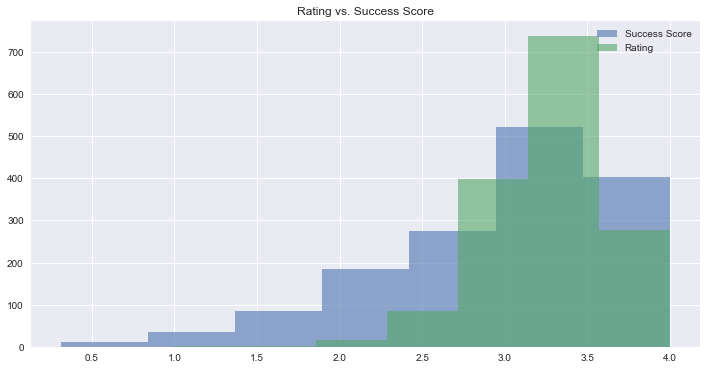

In [10]:
plt.figure(figsize=(12,6))
plt.hist(df['success_score'], bins = 7, alpha=0.6, label='Success Score')
plt.hist(df['rating'], bins = 7, alpha=0.6, label='Rating')
plt.legend(loc='upper right')
plt.title('Rating vs. Success Score')
plt.show()

In [578]:
#log transformation to address skewed data
df['ln_calories'] = np.log(df['calories'])
df['ln_cholesterol'] = np.log(df['cholesterol'])
df['ln_sodium'] = np.log(df['sodium'])

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [570]:
X = df['ln_calories']
y = df['success_score']

lm = sm.OLS(y, X)
lm_fit = lm.fit()


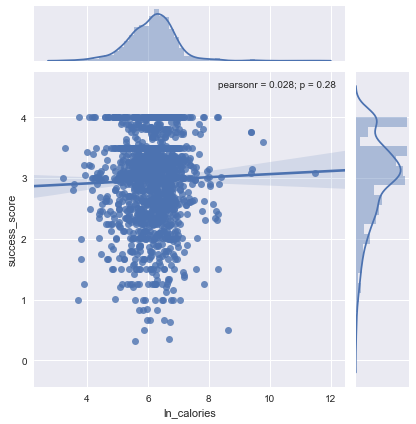

In [595]:
sns.jointplot(x="ln_calories", y="success_score", data=df, kind="reg");

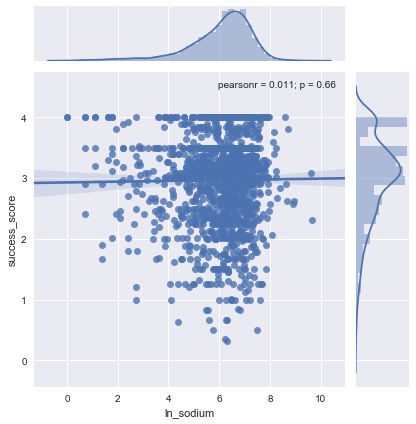

In [569]:
sns.jointplot(x="ln_sodium", y="success_score", data=df, kind="reg");

In [1]:
sns.pairplot(df1[['success_score','url','ln_calories', 'carbohydrates', 'protein', 'ln_cholesterol','ln_sodium', 'reviews_count']])

NameError: name 'sns' is not defined

## Regression Model

### Linear Regression on Basic Features

In [612]:
X = df.drop(['rating','success_score','url','ln_calories', 'ln_cholesterol',''], axis =1)
y = df['success_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
## isolate the features for the training X
X_1 = X_train[['calories', 'carbohydrates', 'protein', 'cholesterol','sodium','cooking_time']]

ValueError: labels [''] not contained in axis

In [613]:
## Add constant and use StatsModels to generate an OLS regression model
X_1 = sm.add_constant(X_1)
lm1 = sm.OLS(y_train, X_1)
lm1_fit = lm1.fit()
lm1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_score   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.979
Date:                Tue, 30 Jan 2018   Prob (F-statistic):             0.0658
Time:                        23:50:05   Log-Likelihood:                -1129.9
No. Observations:                1061   AIC:                             2274.
Df Residuals:                    1054   BIC:                             2309.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9939      0.038     77.830      0.000       2.918       3.069
calories          0.0001   5.77e-05      2.377      0.018    2.39e-05       0.000
carbohydrates    -0.0016      0.001     -2.719      0.007      -0.003      -0.000
protein          -0.0007      0.001     -0.539      0.590      -0.003       0.002
cholesterol      -0.0004      0.000     -2.212      0.027      -0.001   -4.79e-05
sodium         6.582e-05   3.43e-05      1.917      0.056   -1.55e-06       0.000
cooking_time   -3.72e-06      0.000     -0.011      0.991      -0.001       0.001
==============================================================================
Omnibus:                       82.082   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.876
Skew:                          -0.716   Prob(JB):                     2.05e-22
Kurtosis:                       3.460   Cond. No.                     2.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linear Regression on categorical variables for Ingredients

In [614]:
## Exclude basic variables
X_2 = X_train.drop(['calories', 'carbohydrates', 'protein', 'cholesterol', 'sodium', 'reviews_count','cooking_time'], 1)

In [615]:
lm2 = sm.OLS(y_train, X_2)
lm2_fit = lm2.fit()
lm2_fit.summary()

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1574: RuntimeWarning: invalid value encountered in greater
  return (S > tol).sum(axis=-1)


LinAlgError: SVD did not converge

### Linear Regression on all features

In [616]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lm3 = sm.OLS(y_train, X_train)
lm3_fit = lm3.fit()
lm3_fit.summary()

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1574: RuntimeWarning: invalid value encountered in greater
  return (S > tol).sum(axis=-1)


LinAlgError: SVD did not converge

R^2 = 79%

In [360]:
"""Prob (F-statisic): If p-value < 0.05, we can reject the null hypothesis.
P >|t|: if p-value < 0.05, we can reject the null hypothesis: This variable does contribute to this model
Prob(Omnibus): The p-value for this test. If p-value < 0.05, we reject the null hypothesis, meaning that the residuals do not exactly follow the normal distribution that we assumed.
Jaque Beara: Normality Test
Prob(JB) Null hypothesis: ε is normally distributed.
Skewness and Kurtosis: Idea is we are looking for a skewness coeff. ~ 0, and Kurtosis ~ 3. JB tests if those conditions are held against alternatives.
Condition Number: Note that as the condition number becomes quite large, then this implies that the matrix is ill-posed (does not have a unique, well-defined solution). This may be due to multicollinear relationships between independent variables"""

'Prob (F-statisic): If p-value < 0.05, we can reject the null hypothesis.\nP >|t|: if p-value < 0.05, we can reject the null hypothesis: This variable does contribute to this model\nProb(Omnibus): The p-value for this test. If p-value < 0.05, we reject the null hypothesis, meaning that the residuals do not exactly follow the normal distribution that we assumed.\nJaque Beara: Normality Test\nProb(JB) Null hypothesis: ε is normally distributed.\nSkewness and Kurtosis: Idea is we are looking for a skewness coeff. ~ 0, and Kurtosis ~ 3. JB tests if those conditions are held against alternatives.\nCondition Number: Note that as the condition number becomes quite large, then this implies that the matrix is ill-posed (does not have a unique, well-defined solution). This may be due to multicollinear relationships between independent variables'

### Predictions and Evaluations

In [361]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.557191372889
MSE: 0.5282220136
RMSE: 0.726788837008


Text(0,0.5,'Predicted outcome')

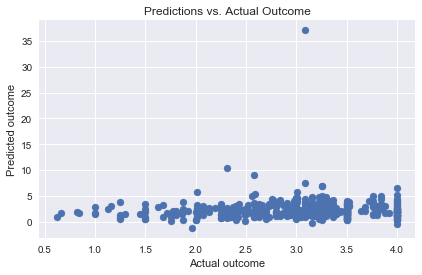

In [362]:
y_predicted = lm3_fit.predict(X_test)

plt.scatter(y_test, y_predicted)
plt.title('Predictions vs. Actual Outcome')
plt.xlabel('Actual outcome')
plt.ylabel('Predicted outcome')

#### Residual Histogram

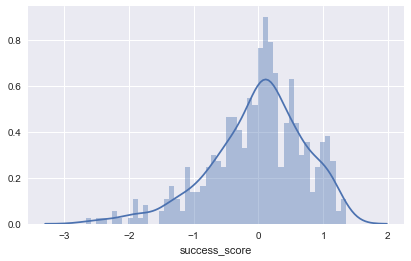

In [363]:
#residuals normal distributed
sns.distplot((y_test-predictions),bins=50);


Text(0,0.5,'Residuals')

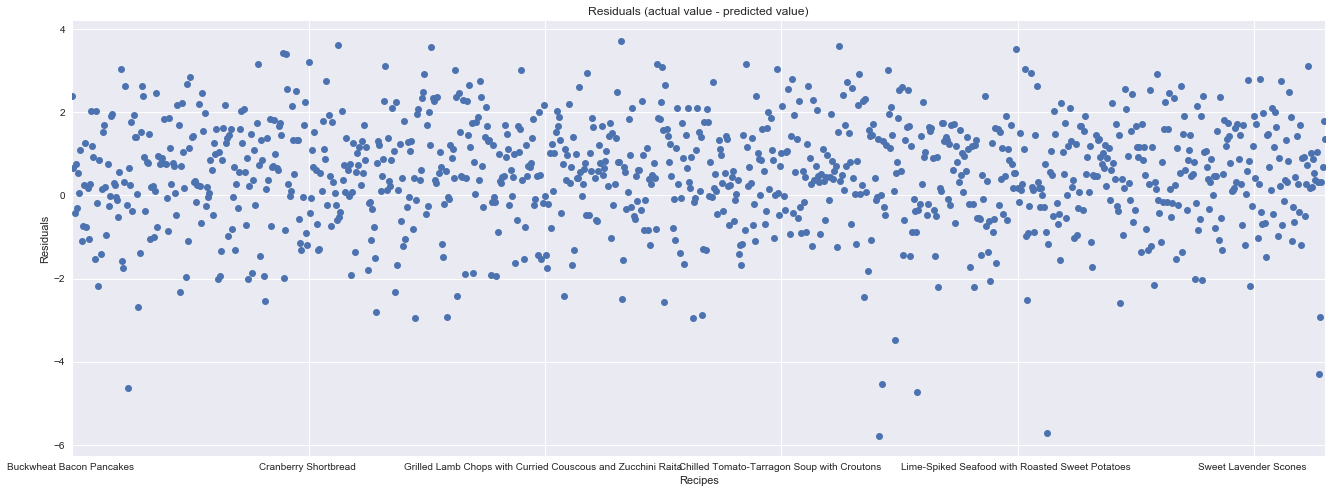

In [372]:
#homoscedasticity
lm3_fit.resid.plot(style='o', figsize=(20,8))
plt.title('Residuals (actual value - predicted value)')
plt.xlabel('Recipes')
plt.ylabel('Residuals')

## Cross-validation

In [490]:
X = df.drop(['rating','success_score','url'], axis =1)
y = df['success_score']

In [491]:
lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv = 5)
print (scores, scores.mean())

[-0.00464247 -0.20905929 -0.54031641 -0.41766252 -0.32304904] -0.298945943454


/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


encv: alpha = 1e-07 mean squared error = 0.444047789874
encv: alpha = 1e-06 mean squared error = 0.444047795013
encv: alpha = 1e-05 mean squared error = 0.444048307882
encv: alpha = 0.0001 mean squared error = 0.444098646077
encv: alpha = 0.001 mean squared error = 0.447944134359
encv: alpha = 0.01 mean squared error = 0.488052084272
encv: alpha = 1 mean squared error = 0.49264063327
encv: alpha = 10.0 mean squared error = 0.504599352439
encv: alpha = 100.0 mean squared error = 0.504946867256
encv: alpha = 1000.0 mean squared error = 0.504946867256
encv: alpha = 10000.0 mean squared error = 0.504946867256
encv: alpha = 100000.0 mean squared error = 0.504946867256
encv: alpha = 1000000.0 mean squared error = 0.504946867256
encv: alpha = 10000000.0 mean squared error = 0.504946867256
rcv: alpha = 1e-07 mean squared error = 0.444047789822
rcv: alpha = 1e-06 mean squared error = 0.444047789822
rcv: alpha = 1e-05 mean squared error = 0.444047789822
rcv: alpha = 0.0001 mean squared error = 0

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "upper_left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


Text(0.5,1,'MSE vs log(Alpha)')

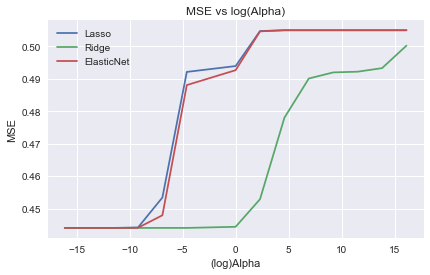

In [495]:

from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
encv = ElasticNetCV(cv = 10, alphas = [1e-5,1e-3,1,1e3,1e5])



alphas = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7]
enmse = []
for a in alphas:
    encv = ElasticNetCV(cv = 10, alphas =[a])
    encv.fit(X,y)
    enmse.append(mean_squared_error(y,encv.predict(X)))
    print('encv: alpha =',a, 'mean squared error =',mean_squared_error(y,encv.predict(X)))
    
rmse = []
for a in alphas:
    rcv = RidgeCV(cv = 10, alphas =[a])
    rcv.fit(X,y)
    rmse.append(mean_squared_error(y,rcv.predict(X)))
    print('rcv: alpha =',a, 'mean squared error =',mean_squared_error(y,rcv.predict(X)))
    
lmse = []
for a in alphas:
    lcv = LassoCV(cv = 10, alphas =[a])
    lcv.fit(X,y)
    lmse.append(mean_squared_error(y,lcv.predict(X)))
    print('lmse: alpha =',a, 'mean squared error =',mean_squared_error(y,lcv.predict(X)))
    
plt.figure(figsize=(20,10))    
fig, ax = plt.subplots(1,1)
ax.plot(np.log(alphas),lmse, label='Lasso')
ax.plot(np.log(alphas),rmse, label='Ridge')
ax.plot(np.log(alphas),enmse, label = 'ElasticNet')
leg = plt.legend(loc='upper_left', fancybox=True)
plt.xlabel('(log)Alpha')
plt.ylabel('MSE')
plt.title('MSE vs log(Alpha)')

The option that minimize the MSE is Ridge Regularization with alpha = 0.0001

### Ridge Regularization alpha = 0.0001

In [456]:
X = df.drop(['rating','success_score','url','reviews_count'], axis =1)
y = df['success_score']
from sklearn.linear_model import Ridge
rcv = Ridge(alpha=0.001)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


rcv.fit(X_train,y_train)
predicts = rcv.predict(X_test)
rcv.score(X_test, y_test)

-0.020479418903678992

Text(0,0.5,'Predicted outcome')

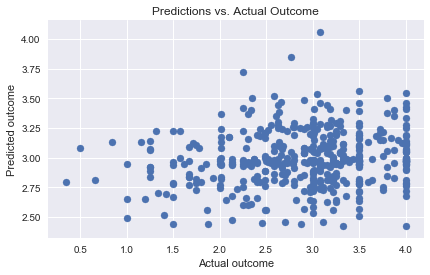

In [457]:
y_predicted = rcv.predict(X_test)

plt.scatter(y_test, y_predicted)
plt.title('Predictions vs. Actual Outcome')
plt.xlabel('Actual outcome')
plt.ylabel('Predicted outcome')

In [447]:
coeff_df = pd.DataFrame(rcv.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
calories,0.000040
carbohydrates,-0.000883
protein,0.001313
cholesterol,-0.000114
sodium,0.000029
cooking_time,-0.000173
Egg,-0.130478
Pork,-0.253099
Parmesan,0.053363
Herb,0.194283
